In [ ]:
# /data/data 
# 음성 데이터 경로 
# /data/data/audiocaps_1m , audiocaps_1m 는 test/ train 각각 나뉨
# /data/data/Clotho/train
# /data/data/GigaSpeech/n 이런 식으로 구성 
# /data/data/LibriSpeech  -> test-other / train-clean-100 / train-clean-360 / train-other-500 /  ex: train-other-600/10 이런 식으로 이 안으로 들어감
# /data/data/MusicNet/train
# /data/data/WavCaps/ AudioSet_SL , BBC_Sound_Effects, FreeSound, SounudBible 


# json file 경로
# stage1_train.json : /data/data/stage1_train.json
# stage2_train.json : /data/data/stage2_train.json

### stage1/ stage2 annotation 갯수 파악

In [20]:
import json

# JSON 파일 경로 리스트
json_paths = {
    "stage1_train": r"/data/data/stage1_train.json",
    "stage2_train": r"/data/data/stage2_train.json",
}

def read_json(file_path):

    try:
        with open(file_path, 'r', encoding='utf-8') as f:
            return json.load(f)
    except Exception as e:
        print(f"Error loading {file_path}: {e}")
        return None

def print_annotations_summary(data, dataset_name):

    if 'annotation' in data:
        print(f"{dataset_name} Total Annotations: {len(data['annotation'])}")
        print(f"\nSample from {dataset_name}:")
        print(data['annotation'][0])
    else:
        print(f"{dataset_name} does not contain 'annotation' key.")

for name, path in json_paths.items():
    print(f"\nProcessing {name}...")
    data = read_json(path)
    if data:
        print_annotations_summary(data, name)
    else:
        print(f"Failed to load data for {name}.")



Processing stage1_train...
stage1_train Total Annotations: 1573558

Sample from stage1_train:
{'path': '/LibriSpeech/train-clean-100/103/1240/103-1240-0000.flac', 'text': 'Chapter one missus rachel lynde is surprised missus rachel lynde lived just where the avonlea main road dipped down into a little hollow fringed with alders and ladies eardrops and traversed by a brook', 'task': 'asr'}

Processing stage2_train...
stage2_train Total Annotations: 1403890

Sample from stage2_train:
{'path': 'GigaSpeech/16/POD0000010316_S0000117.wav', 'text': 'And like staring down the barrel of this coming school year, like the end of summer and is thinking of quitting or putting their career on hold because of their kids.', 'task': 'asr'}


### 각각의 json 파일 안에 어떤 테스크들이 존재하고, 각 테스크에 대한 데이터가 몇 개인지 확인하는 코드 

In [21]:
from collections import Counter

def count_tasks(data):
    if 'annotation' in data:
        tasks = [item['task'] for item in data['annotation']]
        return Counter(tasks)
    else:
        print("No 'annotation' key found in the data.")
        return Counter()

for name, path in json_paths.items():
    print(f"\nProcessing {name}...")
    data = read_json(path)
    if data:
        print(f"{name} Total Annotations: {len(data['annotation'])}")
        print(f"Sample from {name}:")
        print(data['annotation'][0])

        task_counts = count_tasks(data)
        print(f"\nTask Counts for {name}:")
        for task, count in task_counts.items():
            print(f"{task}: {count}")
    else:
        print(f"Failed to load data for {name}.")



Processing stage1_train...
stage1_train Total Annotations: 1573558
Sample from stage1_train:
{'path': '/LibriSpeech/train-clean-100/103/1240/103-1240-0000.flac', 'text': 'Chapter one missus rachel lynde is surprised missus rachel lynde lived just where the avonlea main road dipped down into a little hollow fringed with alders and ladies eardrops and traversed by a brook', 'task': 'asr'}

Task Counts for stage1_train:
asr: 1191381
audiocaption: 382177

Processing stage2_train...
stage2_train Total Annotations: 1403890
Sample from stage2_train:
{'path': 'GigaSpeech/16/POD0000010316_S0000117.wav', 'text': 'And like staring down the barrel of this coming school year, like the end of summer and is thinking of quitting or putting their career on hold because of their kids.', 'task': 'asr'}

Task Counts for stage2_train:
asr: 481241
QA: 551759
phone_recognition: 281239
audiocaption_v2: 61112
gender_recognition: 28539


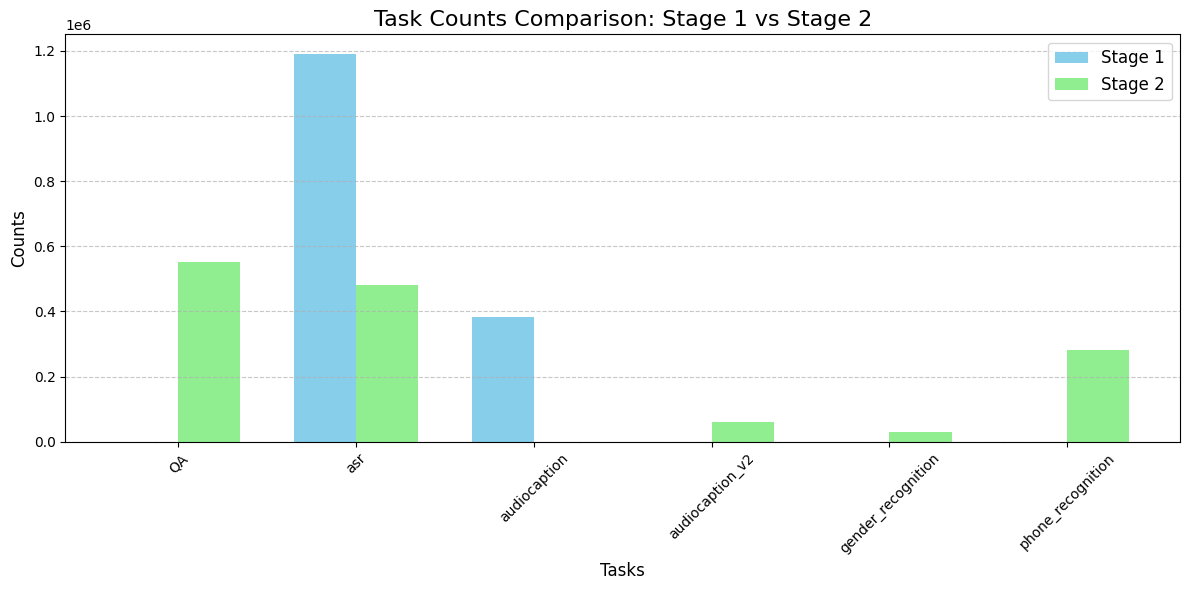

In [18]:
import matplotlib.pyplot as plt
import numpy as np

task_counts_stage1 = {"asr": 1191381, "audiocaption": 382177}
task_counts_stage2 = {
    "asr": 481241,
    "QA": 551759,
    "phone_recognition": 281239,
    "audiocaption_v2": 61112,
    "gender_recognition": 28539,
}

all_tasks = list(set(task_counts_stage1.keys()).union(task_counts_stage2.keys()))
all_tasks.sort()  

stage1_counts = [task_counts_stage1.get(task, 0) for task in all_tasks]
stage2_counts = [task_counts_stage2.get(task, 0) for task in all_tasks]

x = np.arange(len(all_tasks))  
width = 0.35 

plt.figure(figsize=(12, 6))
plt.bar(x - width/2, stage1_counts, width, label="Stage 1", color="skyblue")
plt.bar(x + width/2, stage2_counts, width, label="Stage 2", color="lightgreen")

# 그래프 설정
plt.xlabel("Tasks", fontsize=12)
plt.ylabel("Counts", fontsize=12)
plt.title("Task Counts Comparison: Stage 1 vs Stage 2", fontsize=16)
plt.xticks(x, all_tasks, rotation=45, fontsize=10)
plt.legend(fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()  

# 그래프 출력
plt.show()


datasets = ["audiocaps", "LibriSpeech", "MusicNet", "Clotho", "GigaSpeech", "WavCaps"] 데이터들이 각각 몇개 존재하는 지 파악

In [22]:
from collections import Counter

def count_datasets_by_path(data, datasets):
    if 'annotation' in data:
        paths = [item['path'] for item in data['annotation']]
        dataset_counts = Counter()
        for path in paths:
            for dataset in datasets:
                if dataset in path:  # Check if dataset name is in the file path
                    dataset_counts[dataset] += 1
                    break
        return dataset_counts
    else:
        print("No 'annotation' key found in the data.")
        return Counter()

datasets = ["audiocaps_1m", "LibriSpeech", "MusicNet", "Clotho", "GigaSpeech", "WavCaps"]

for name, path in json_paths.items():
    print(f"\nProcessing {name}...")
    data = read_json(path)
    if data:
        print(f"{name} Total Annotations: {len(data['annotation'])}")
        print(f"Sample from {name}:")
        print(data['annotation'][0])

        dataset_counts = count_datasets_by_path(data, datasets)
        print(f"\nDataset Counts for {name}:")
        for dataset, count in dataset_counts.items():
            print(f"{dataset}: {count}")
    else:
        print(f"Failed to load data for {name}.")



Processing stage1_train...
stage1_train Total Annotations: 1573558
Sample from stage1_train:
{'path': '/LibriSpeech/train-clean-100/103/1240/103-1240-0000.flac', 'text': 'Chapter one missus rachel lynde is surprised missus rachel lynde lived just where the avonlea main road dipped down into a little hollow fringed with alders and ladies eardrops and traversed by a brook', 'task': 'asr'}

Dataset Counts for stage1_train:
LibriSpeech: 281241
GigaSpeech: 910140
WavCaps: 367712
Clotho: 14465

Processing stage2_train...
stage2_train Total Annotations: 1403890
Sample from stage2_train:
{'path': 'GigaSpeech/16/POD0000010316_S0000117.wav', 'text': 'And like staring down the barrel of this coming school year, like the end of summer and is thinking of quitting or putting their career on hold because of their kids.', 'task': 'asr'}

Dataset Counts for stage2_train:
GigaSpeech: 200000
LibriSpeech: 872056
WavCaps: 270402
audiocaps_1m: 46647
Clotho: 14465
MusicNet: 320


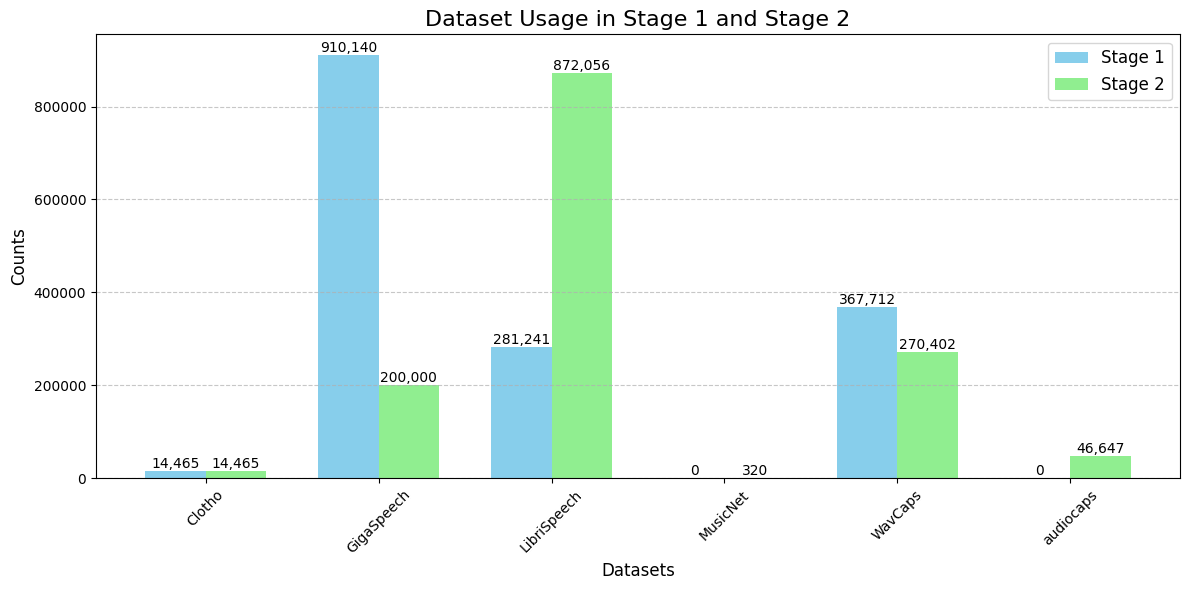

In [1]:
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np

# Count datasets by path
def count_datasets_by_path(data, datasets):
    if 'annotation' in data:
        paths = [item['path'] for item in data['annotation']]
        dataset_counts = Counter()
        for path in paths:
            for dataset in datasets:
                if dataset in path:
                    dataset_counts[dataset] += 1
                    break
        return dataset_counts
    return Counter()

datasets = ["audiocaps", "LibriSpeech", "MusicNet", "Clotho", "GigaSpeech", "WavCaps"]

dataset_counts_stage1 = {
    "LibriSpeech": 281241,
    "GigaSpeech": 910140,
    "WavCaps": 367712,
    "Clotho": 14465,
}
dataset_counts_stage2 = {
    "GigaSpeech": 200000,
    "LibriSpeech": 872056,
    "WavCaps": 270402,
    "audiocaps": 46647,
    "Clotho": 14465,
    "MusicNet": 320,
}

datasets = list(set(dataset_counts_stage1.keys()).union(dataset_counts_stage2.keys()))
datasets.sort()

stage1_counts = [dataset_counts_stage1.get(ds, 0) for ds in datasets]
stage2_counts = [dataset_counts_stage2.get(ds, 0) for ds in datasets]

x = np.arange(len(datasets))
width = 0.35

plt.figure(figsize=(12, 6))
bar1 = plt.bar(x - width / 2, stage1_counts, width, label="Stage 1", color="skyblue")
bar2 = plt.bar(x + width / 2, stage2_counts, width, label="Stage 2", color="lightgreen")

for bar in bar1:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{bar.get_height():,}', ha='center', va='bottom', fontsize=10)
for bar in bar2:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{bar.get_height():,}', ha='center', va='bottom', fontsize=10)

plt.xlabel("Datasets", fontsize=12)
plt.ylabel("Counts", fontsize=12)
plt.title("Dataset Usage in Stage 1 and Stage 2", fontsize=16)
plt.xticks(x, datasets, rotation=45, fontsize=10)
plt.legend(fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()


In [23]:
import json
from collections import Counter

def read_json(file_path):
    with open(file_path, 'r', encoding='utf-8') as f:
        data = json.load(f)
    return data

def count_tasks_by_dataset(data, datasets):
    dataset_task_counts = {dataset: Counter() for dataset in datasets}
    for item in data['annotation']:
        path = item['path']
        task = item['task']
        for dataset in datasets:
            if dataset in path: 
                dataset_task_counts[dataset][task] += 1
                break
    return dataset_task_counts

datasets = ["audiocaps_1m", "LibriSpeech", "MusicNet", "Clotho", "GigaSpeech", "WavCaps"]

data_stage1 = read_json(stage1_train_json)
data_stage2 = read_json(stage2_train_json)

task_counts_stage1 = count_tasks_by_dataset(data_stage1, datasets)
task_counts_stage2 = count_tasks_by_dataset(data_stage2, datasets)

print("Task Counts for Stage 1:")
for dataset, tasks in task_counts_stage1.items():
    print(f"{dataset}: {dict(tasks)}")

print("\nTask Counts for Stage 2:")
for dataset, tasks in task_counts_stage2.items():
    print(f"{dataset}: {dict(tasks)}")


Task Counts for Stage 1:
audiocaps_1m: {}
LibriSpeech: {'asr': 281241}
MusicNet: {}
Clotho: {'audiocaption': 14465}
GigaSpeech: {'asr': 910140}
WavCaps: {'audiocaption': 367712}

Task Counts for Stage 2:
audiocaps_1m: {'audiocaption_v2': 46647}
LibriSpeech: {'QA': 281037, 'asr': 281241, 'phone_recognition': 281239, 'gender_recognition': 28539}
MusicNet: {'QA': 320}
Clotho: {'audiocaption_v2': 14465}
GigaSpeech: {'asr': 200000}
WavCaps: {'QA': 270402}


### audiocaps 

In [9]:
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

base_path = "/data/data/audiocaps_1m/"
folders_to_explore = [
    os.path.join(base_path, "train")
]

all_flac_files = []

for folder in folders_to_explore:
    for root, dirs, files in os.walk(folder):
        for filename in files:
            if filename.endswith(".wav"):
                full_path = os.path.join(root, filename)
                all_flac_files.append(full_path)

print(f"총 {len(all_flac_files)}개의 flac 파일을 찾았습니다.")
for flac_file in all_flac_files[:10]: 
    print(flac_file)


총 46647개의 flac 파일을 찾았습니다.
/data/data/audiocaps_1m/train/18218.wav
/data/data/audiocaps_1m/train/35691.wav
/data/data/audiocaps_1m/train/23442.wav
/data/data/audiocaps_1m/train/15861.wav
/data/data/audiocaps_1m/train/11976.wav
/data/data/audiocaps_1m/train/8775.wav
/data/data/audiocaps_1m/train/23967.wav
/data/data/audiocaps_1m/train/62725.wav
/data/data/audiocaps_1m/train/22857.wav
/data/data/audiocaps_1m/train/65336.wav


총 46647개의 파일 분석 완료
평균 길이: 1.93 초
중앙값 길이: 0.00 초
최대 길이: 60.00 초
최소 길이: 0.00 초


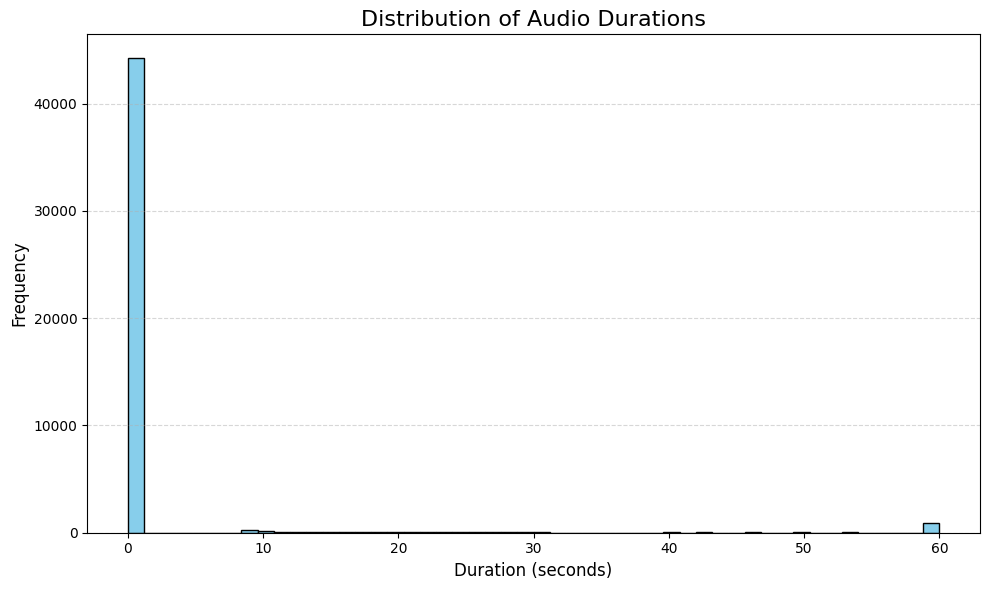

/tmp/ipykernel_2860587/78398561.py:46: FutureWarning: waveshow() keyword argument 'x_axis' has been renamed to 'axis' in version 0.10.0.
	This alias will be removed in version 1.0.
  librosa.display.waveshow(y, sr=sr, x_axis="time")


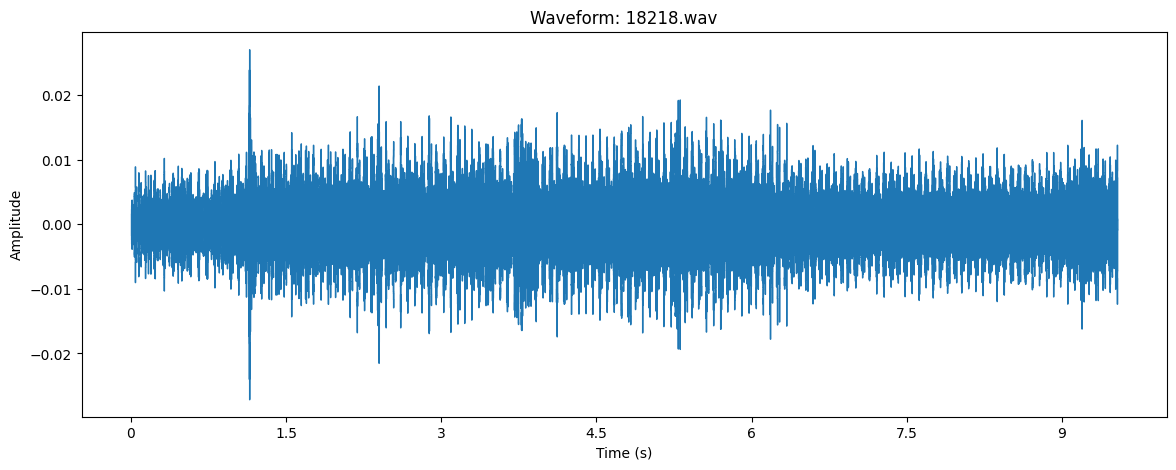

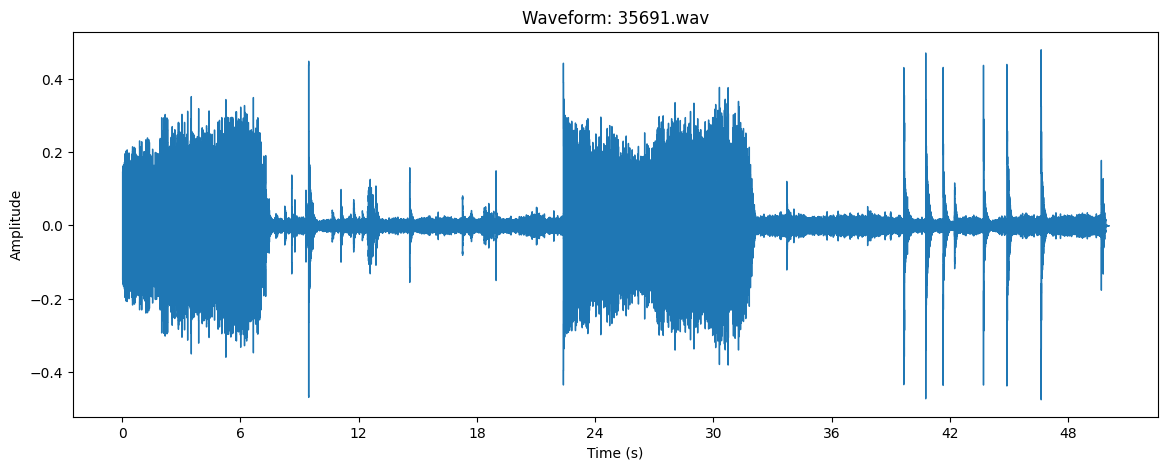

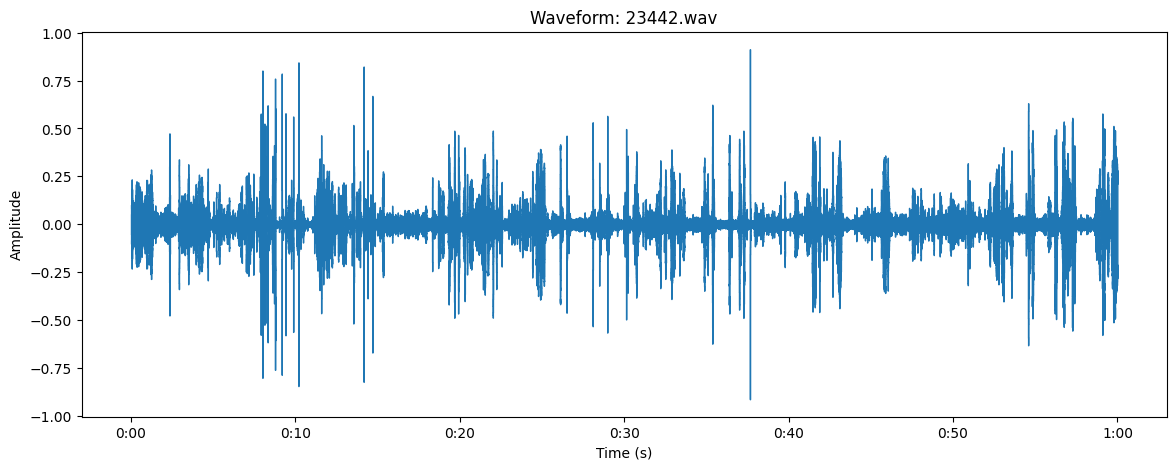

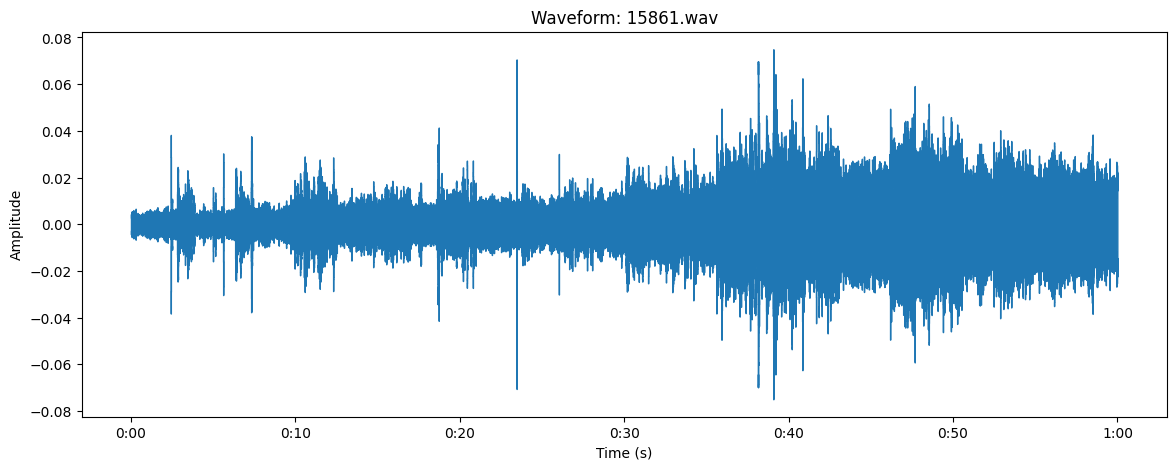

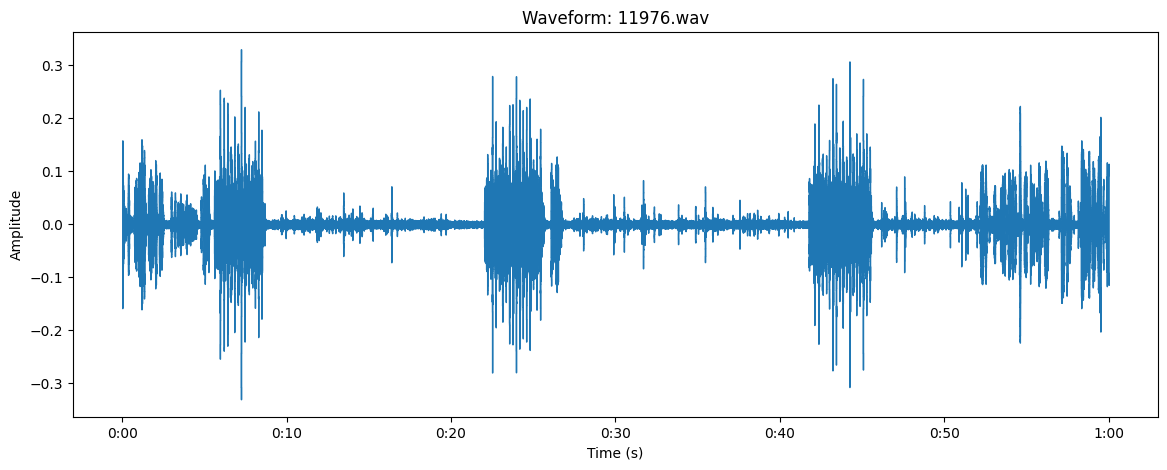

In [10]:

durations = [] 
waveforms = [] 

for idx, flac_file in enumerate(all_flac_files):
    try:
        y, sr = librosa.load(flac_file, sr=None, mono=False) 
        duration = len(y) / sr 
        durations.append(duration)
        
        if len(waveforms) < 5:
            waveforms.append((y, sr, os.path.basename(flac_file)))
    except Exception as e:
        print(f"Error processing {flac_file}: {e}")
        continue  

mean_duration = np.mean(durations)
median_duration = np.median(durations)
max_duration = np.max(durations)
min_duration = np.min(durations)

print(f"총 {len(durations)}개의 파일 분석 완료")
print(f"평균 길이: {mean_duration:.2f} 초")
print(f"중앙값 길이: {median_duration:.2f} 초")
print(f"최대 길이: {max_duration:.2f} 초")
print(f"최소 길이: {min_duration:.2f} 초")

plt.figure(figsize=(10, 6))
plt.hist(durations, bins=50, color='skyblue', edgecolor='black')
plt.title("Distribution of Audio Durations", fontsize=16)
plt.xlabel("Duration (seconds)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

for y, sr, file_name in waveforms:
    plt.figure(figsize=(14, 5))
    librosa.display.waveshow(y, sr=sr, x_axis="time")
    plt.title(f"Waveform: {file_name}")
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")
    plt.show()
